Iteration 1 | Loss: 1.1633 | Accuracy: 0.25
Iteration 50 | Loss: 0.5813 | Accuracy: 0.75
Iteration 100 | Loss: 0.5632 | Accuracy: 0.75
Iteration 150 | Loss: 0.5624 | Accuracy: 0.75
Iteration 200 | Loss: 0.5623 | Accuracy: 0.75
Iteration 250 | Loss: 0.5623 | Accuracy: 0.75
Iteration 300 | Loss: 0.5623 | Accuracy: 0.75
Iteration 350 | Loss: 0.5623 | Accuracy: 0.75
Iteration 400 | Loss: 0.5623 | Accuracy: 0.75
Iteration 450 | Loss: 0.5623 | Accuracy: 0.75
Iteration 500 | Loss: 0.5623 | Accuracy: 0.75


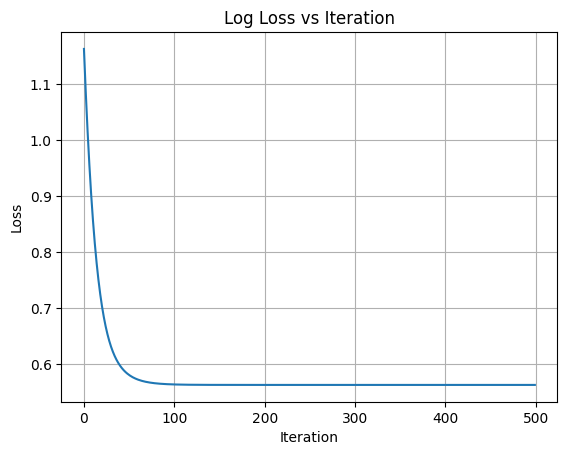

Tahminler: [[0 0 0 0]]
Gerçekler: [[0 0 1 0]]
Iteration 1 | Loss: 0.5623 | Accuracy: 0.75
Iteration 50 | Loss: 0.5623 | Accuracy: 0.75
Iteration 100 | Loss: 0.5623 | Accuracy: 0.75
Iteration 150 | Loss: 0.5623 | Accuracy: 0.75
Iteration 200 | Loss: 0.5623 | Accuracy: 0.75
Iteration 250 | Loss: 0.5623 | Accuracy: 0.75
Iteration 300 | Loss: 0.5623 | Accuracy: 0.75
Iteration 350 | Loss: 0.5623 | Accuracy: 0.75
Iteration 400 | Loss: 0.5623 | Accuracy: 0.75
Iteration 450 | Loss: 0.5623 | Accuracy: 0.75
Iteration 500 | Loss: 0.5623 | Accuracy: 0.75


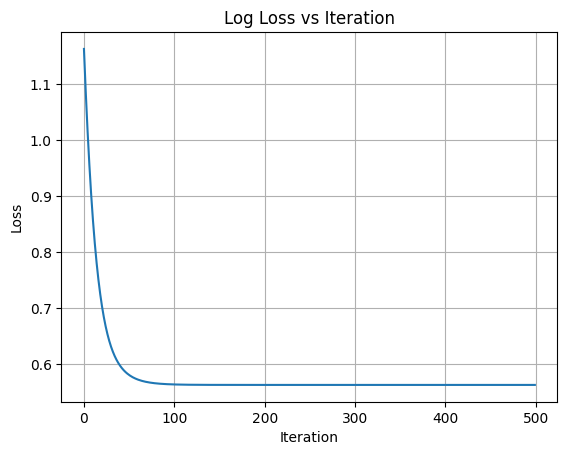

Iteration 1 | Loss: 0.5623 | Accuracy: 0.75
Iteration 50 | Loss: 0.5623 | Accuracy: 0.75
Iteration 100 | Loss: 0.5623 | Accuracy: 0.75
Iteration 150 | Loss: 0.5623 | Accuracy: 0.75
Iteration 200 | Loss: 0.5623 | Accuracy: 0.75
Iteration 250 | Loss: 0.5623 | Accuracy: 0.75
Iteration 300 | Loss: 0.5623 | Accuracy: 0.75
Iteration 350 | Loss: 0.5623 | Accuracy: 0.75
Iteration 400 | Loss: 0.5623 | Accuracy: 0.75
Iteration 450 | Loss: 0.5623 | Accuracy: 0.75
Iteration 500 | Loss: 0.5623 | Accuracy: 0.75
Iteration 550 | Loss: 0.5623 | Accuracy: 0.75
Iteration 600 | Loss: 0.5623 | Accuracy: 0.75
Iteration 650 | Loss: 0.5623 | Accuracy: 0.75
Iteration 700 | Loss: 0.5623 | Accuracy: 0.75
Iteration 750 | Loss: 0.5623 | Accuracy: 0.75
Iteration 800 | Loss: 0.5623 | Accuracy: 0.75
Iteration 850 | Loss: 0.5623 | Accuracy: 0.75
Iteration 900 | Loss: 0.5623 | Accuracy: 0.75
Iteration 950 | Loss: 0.5623 | Accuracy: 0.75
Iteration 1000 | Loss: 0.5623 | Accuracy: 0.75


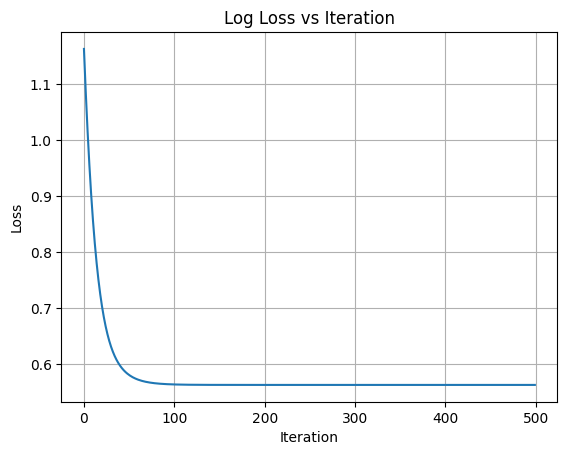

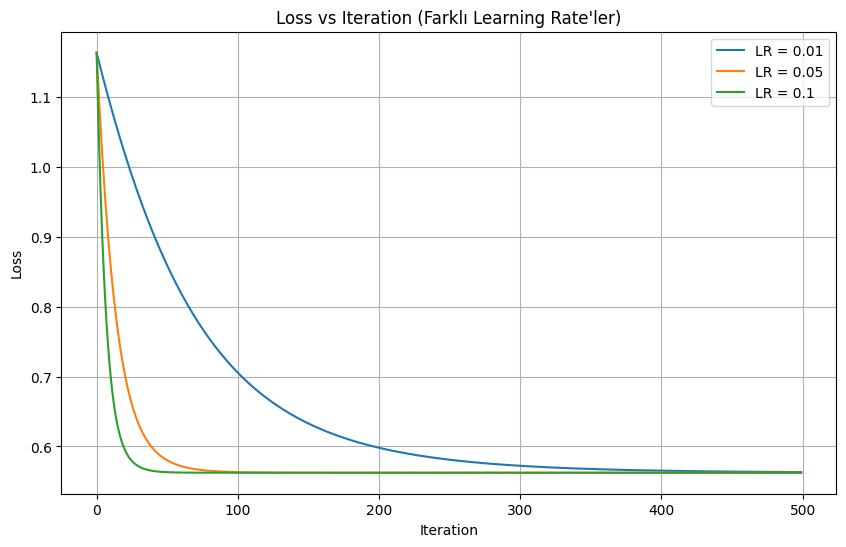

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- VERİ TANIMI ---
# Giriş verisi: 3 özellik, 4 örnek
X = np.array([[7.2, 6.1, 5.9, 8.0],
              [20, 50, 32, 55],
              [77, 66, 85, 70]])  # shape: (3, 4)

# Gerçek çıktı değerleri
y = np.array([[0, 0, 1, 0]])  # shape: (1, 4)

# --- AĞIRLIKLARIN BAŞLATILMASI ---
# İlk katman: 3 giriş -> 2 nöron
W1 = np.array([[0.1, 0.2],
               [0.3, 0.4],
               [0.5, 0.6]])  # shape: (3, 2)
b1 = np.array([[0.1],
               [0.2]])        # shape: (2, 1)

# İkinci katman: 2 giriş -> 1 nöron
W2 = np.array([[0.3],
               [0.4]])        # shape: (2, 1)
b2 = np.array([[0.5]])        # shape: (1, 1)

# --- AKTİVASYON FONKSİYONU ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

# --- KAYIP FONKSİYONU ---
def log_loss(A2, y):
    m = y.shape[1]
    return -1 * (1/m) * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))

# --- GERİ YAYILIM ---
def backward_propagation(X, y, Z1, A1, Z2, A2):
    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1, dZ2.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2, dZ2)
    dZ1 = dA1 * d_sigmoid(Z1)
    dW1 = (1/m) * np.dot(X, dZ1.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# --- PARAMETRE GÜNCELLEME ---
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2
    return W1, b1, W2, b2

# --- TAHMİN ---
def predict(A2):
    return (A2 > 0.5).astype(int)

# --- EĞİTİM ---
def train(X, y, W1, b1, W2, b2, iterations=500, lr=0.05):
    losses = []

    for i in range(iterations):
        # Forward pass
        Z1 = np.dot(W1.T, X) + b1  # (2, 4)
        A1 = sigmoid(Z1)

        Z2 = np.dot(W2.T, A1) + b2  # (1, 4)
        A2 = sigmoid(Z2)

        # Loss
        loss = log_loss(A2, y)
        losses.append(loss)

        # Backward
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2)

        # Update
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        # Output
        if (i+1) % 50 == 0 or i == 0:
            preds = predict(A2)
            acc = np.mean(preds == y)
            print(f"Iteration {i+1} | Loss: {loss:.4f} | Accuracy: {acc:.2f}")

    return losses, W1, b1, W2, b2

# --- EĞİTİMİ BAŞLAT ---
losses, W1, b1, W2, b2 = train(X, y, W1, b1, W2, b2, iterations=500, lr=0.05)

# --- GRAFİK ---
plt.plot(losses)
plt.title("Log Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# --- SON TAHMİN ---
Z1 = np.dot(W1.T, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = sigmoid(Z2)

print("Tahminler:", predict(A2))
print("Gerçekler:", y)


# Deneme 2: Hızlı öğrenme (yüksek learning rate)
train(X, y, W1, b1, W2, b2, iterations=500, lr=0.1)
# --- GRAFİK ---
plt.plot(losses)
plt.title("Log Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# --- SON TAHMİN ---
Z1 = np.dot(W1.T, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = sigmoid(Z2)

# Deneme 3: Daha uzun eğitim
train(X, y, W1, b1, W2, b2, iterations=1000, lr=0.05)
# --- GRAFİK ---
plt.plot(losses)
plt.title("Log Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# --- SON TAHMİN ---
Z1 = np.dot(W1.T, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = sigmoid(Z2)

def compare_learning_rates(X, y, W1_init, b1_init, W2_init, b2_init, rates, iterations=500):
    plt.figure(figsize=(10, 6))

    for lr in rates:
        # Her learning rate için ağırlıkları sıfırdan başlat
        W1 = W1_init.copy()
        b1 = b1_init.copy()
        W2 = W2_init.copy()
        b2 = b2_init.copy()

        losses = []

        for i in range(iterations):
            # Forward
            Z1 = np.dot(W1.T, X) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2.T, A1) + b2
            A2 = sigmoid(Z2)

            # Loss
            loss = log_loss(A2, y)
            losses.append(loss)

            # Backward + update
            dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2)
            W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        # Grafik çiz
        plt.plot(range(iterations), losses, label=f"LR = {lr}")

    plt.title("Loss vs Iteration (Farklı Learning Rate'ler)")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


# İlk ağırlıkları sakla (her deneme aynı yerden başlasın)
W1_init = np.array([[0.1, 0.2],
                    [0.3, 0.4],
                    [0.5, 0.6]])
b1_init = np.array([[0.1],
                    [0.2]])
W2_init = np.array([[0.3],
                    [0.4]])
b2_init = np.array([[0.5]])

# Denemek istediğin learning rate’ler:
learning_rates = [0.01, 0.05, 0.1]

# Karşılaştırmayı başlat
compare_learning_rates(X, y, W1_init, b1_init, W2_init, b2_init, learning_rates, iterations=500)
